In [157]:
import pandas as pd 
data = pd.read_csv("titanic-passengers.csv",delimiter=";")
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [158]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [159]:
data.fillna(data.mean(),inplace=True)

In [160]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [161]:

data.fillna(data['Cabin'].value_counts().argmax(),inplace=True)
data['Embarked'].fillna(data['Embarked'].value_counts().argmax(),inplace=True)


In [162]:
data.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [163]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,0,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,0,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,0,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,0,S
6,576,No,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,0,S
7,382,Yes,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,0,C
8,228,No,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,0,S
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,0,S


C:\Users\elgar\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


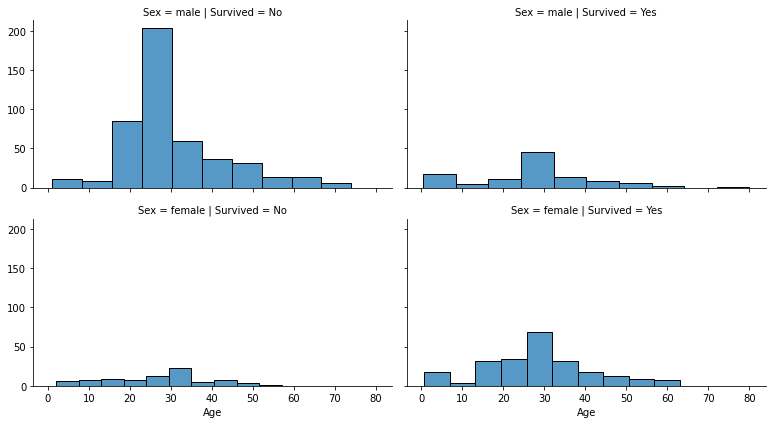

In [164]:
import seaborn as sb
 
grid = sb.FacetGrid(data, row="Sex", col="Survived", size=3, aspect=1.8)
grid.map(sb.histplot,"Age", bins=10)
grid.add_legend()


C:\Users\elgar\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\elgar\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


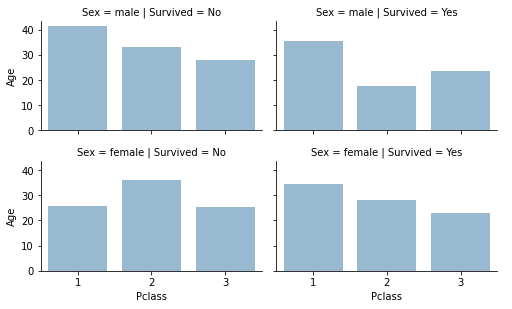

In [165]:
grid2 = sb.FacetGrid(data, row="Sex", col="Survived", size=2.2, aspect=1.6)
grid2.map(sb.barplot, "Pclass", "Age", alpha=.5, ci=None)
grid2.add_legend()

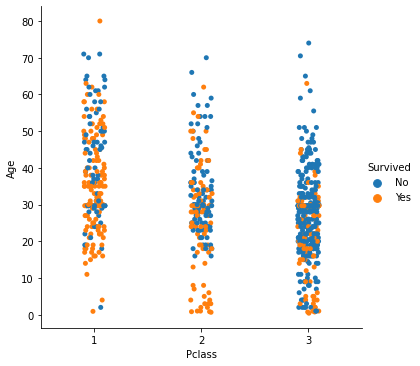

In [166]:
g = sb.catplot(x="Pclass", y="Age", hue="Survived", data=data)
g

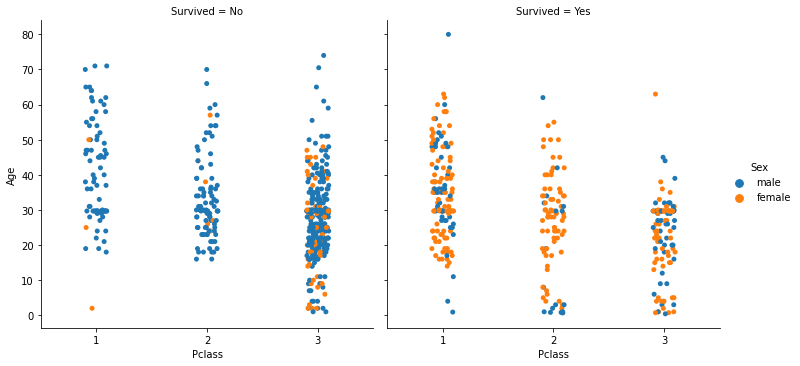

In [167]:
g = sb.catplot(x="Pclass", y = "Age",hue = "Sex",col="Survived", data=data)
g

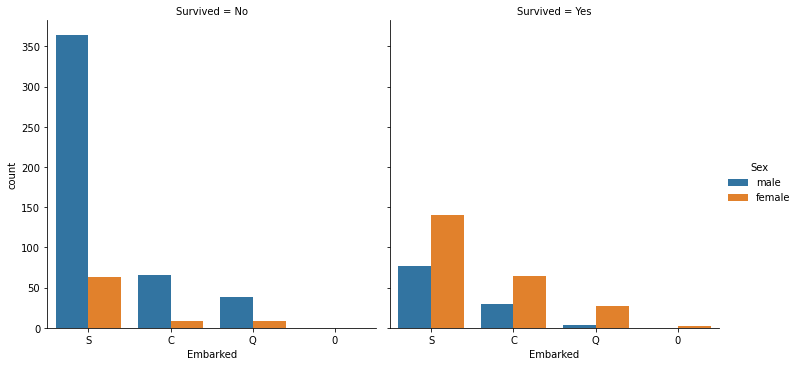

In [168]:
g = sb.catplot(x="Embarked", hue = "Sex",col="Survived", data=data,kind = "count")
g

In [169]:
import matplotlib as plt
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.pyplot.subplots( figsize =( 12 , 10 ) )

    cmap = sb.diverging_palette( 220 , 10 , as_cmap = True )

    s = sb.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

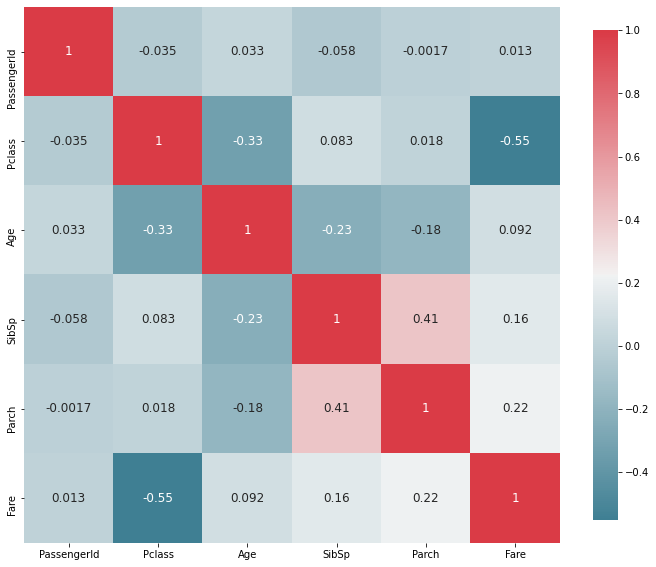

In [170]:
plot_correlation_map(data)

In [171]:
#il y'a une correlaion entre SibSp et Parch  et pas de correlation entre Fare et Pclass 

In [172]:
cleanup={"Survived":{"Yes":1, "No": 0}}  
data.replace(cleanup, inplace=True)
data[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [173]:
#donc les passagers de la classe 1 sont ceux qui ont le plus survécu 

In [174]:
#data.drop('Name',axis=1,inplace=True) 
#will need this column later on 

In [175]:
data.drop('PassengerId',axis=1,inplace=True)
data.drop('Ticket',axis=1,inplace=True)

In [176]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,13.0000,0,S
1,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,7.6500,F G73,S
2,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,7.8542,0,S
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,21.0750,0,S
4,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,52.0000,B71,S


In [177]:
 title=[]
for i in list(data.Name) :
    if(i.find('Mr.')!=-1):
            title.append('Mr')
    elif (i.find('Miss.')!=-1):
             title.append('Miss')
    elif (i.find('Mrs.')!=-1 ):
                 title.append('Mrs')
    elif (i.find('Master.')!=-1):
                 title.append('Master')
    elif (i.find('Rev.')!=-1):
                 title.append('Rev')
    elif (i.find('Major.')!=-1):
                 title.append('Major')
    elif (i.find('Dr.')!=-1):
                 title.append('Dr')
    elif (i.find('Don.')!=-1):
                  title.append('Don')
    elif (i.find('Ms.')!=-1):
                 title.append('Ms')
    elif (i.find('Col.')!=-1):
                 title.append('Col')
    elif (i.find('Mlle.')!=-1):
                 title.append('Mlle')
    elif (i.find('Capt.')!=-1):
                 title.append('Capt')
    elif (i.find('Jonkheer.')!=-1):
                 title.append('Jonkheer')
    elif (i.find('Countess.')!=-1):
                 title.append('the Countess')
    elif (i.find('Mme.')!=-1):
                 title.append('Mme')
    elif (i.find('Lady.')!=-1):
                 title.append('Lady')
    elif (i.find('Sir.')!=-1):
                 title.append('Sir')
   

 data['Title']=title

            

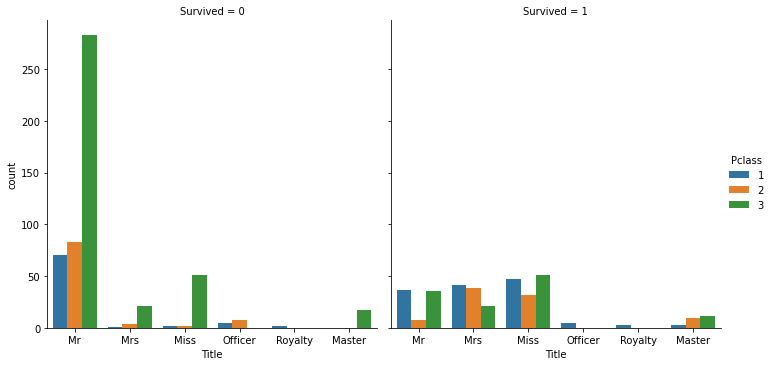

In [183]:
g_title = sb.catplot(x="Title",col="Survived",hue="Pclass", data=data,kind = "count")
g_title

In [179]:
#on peut conclure qu'un très grand nombre d'hommes en classe 3 sont morts 
#la plupart des hommes et femmes de la classe 1 et 2 ont survécu 

In [180]:
data[ data['Title']=='Mr'][data['Sex']=='female']

<ipython-input-180-0fb967e515f0>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[ data['Title']=='Mr'][data['Sex']=='female']


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title


In [181]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer" , 

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty" ,

                  "the Countess": "Royalty",

                    "Dona":       "Royalty" , 

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mr",

                    "Mrs" :       "Mrs" ,

                    "Master" :    "Master"

                    }
data.replace(Title_Dictionary,inplace=True)
data.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
886,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,30.0708,0,C,Mrs
887,0,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,7.2292,0,C,Mr
888,0,3,"Cacic, Miss. Marija",female,30.000000,0,0,8.6625,0,S,Miss
889,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,7.8958,0,S,Mr
890,1,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.000000,0,0,26.0000,0,S,Miss


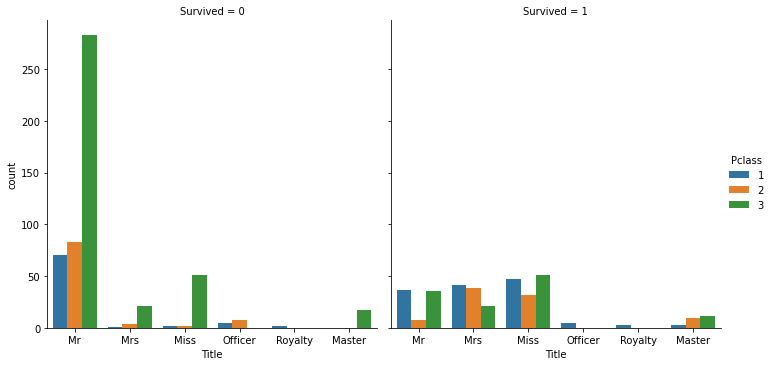

In [184]:
g_title = sb.catplot(x="Title",col="Survived",hue="Pclass", data=data,kind = "count")
g_title

In [189]:
family_size=[]
for i in data.index :
     family_size.append( data.Parch[i] + data.SibSp[i])
        
data["FamilySize"]=family_size
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize
0,0,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,13.0000,0,S,Mr,0
1,0,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,7.6500,F G73,S,Mr,0
2,0,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,7.8542,0,S,Mr,0
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,21.0750,0,S,Mrs,4
4,0,1,"Davidson, Mr. Thornton",male,31.000000,1,0,52.0000,B71,S,Mr,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,30.0708,0,C,Mrs,1
887,0,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,7.2292,0,C,Mr,0
888,0,3,"Cacic, Miss. Marija",female,30.000000,0,0,8.6625,0,S,Miss,0
889,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,7.8958,0,S,Mr,0


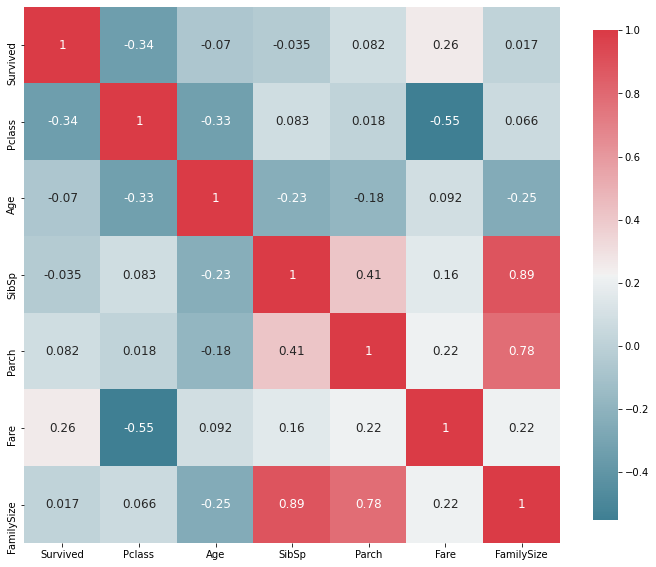

In [192]:
plot_correlation_map(data)

In [ ]:
#ce feature est important il correlle avec plusieurs autres features  